                    LOAN PREDICTION MACHINE LEARNING PROJECT

In [38]:
#Import required ML related libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#To Print the multiple output in ouput cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Hypothesis Generation
# Previous History:If applicant has repayed previous loan has more chances to get the loan approved
# Self Employment: Self employed applicant has less chance to get the loan
# Loan Term: Shorter the loan term has high chance to get the loan approved
# Loan Amount:Less Loan amount like to approved , instead larger amount

# Reading the Data

In [48]:
loan_train=pd.read_csv(r'C:/pers/saurabh/cloud/ML/Analy_Vidya/LOAN_PREDICTION/train.csv')
loan_test=pd.read_csv(r'C:/pers/saurabh/cloud/ML/Analy_Vidya/LOAN_PREDICTION/test.csv')

In [49]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [50]:
loan_train.shape

(614, 13)

In [51]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [52]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [53]:
loan_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [54]:
#Test data has 367 rows and 12 column, Loan_Status column not included since it is Dependent value which need to be predicted
loan_test.shape
loan_train.shape

(367, 12)

(614, 13)

# Univariate Analysis

In [58]:
# Categorical feature 
#Will use frquency plot analysis , like frequency or bar plot , count etc..


In [62]:
#Target Vaiable
loan_train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [63]:
#Normalized value
loan_train.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [65]:
#approx 69% loan got approved
#appro 31% loan dint get approved

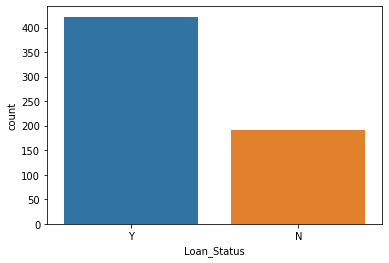

In [71]:
%matplotlib inline
sns.countplot(loan_train.Loan_Status)

In [75]:
#The loan of 422(around 69%) people got approved out of 614 people
loan_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [74]:
# Different type of variable in LOAN data set as below
# Categorical : Gender, Married, ,Self employed ,Credit_History
# Ordinal : Education,Dependents,Property_Area
# Numerical : ApplicantIncome , CoapplicantIncome,LoanAmount,Loan_Amount_Term

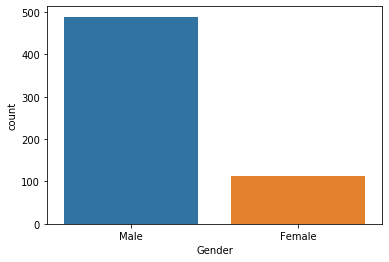

In [82]:
# Categorical(Independent) : Gender
sns.countplot(loan_train.Gender)

<Figure size 432x288 with 0 Axes>

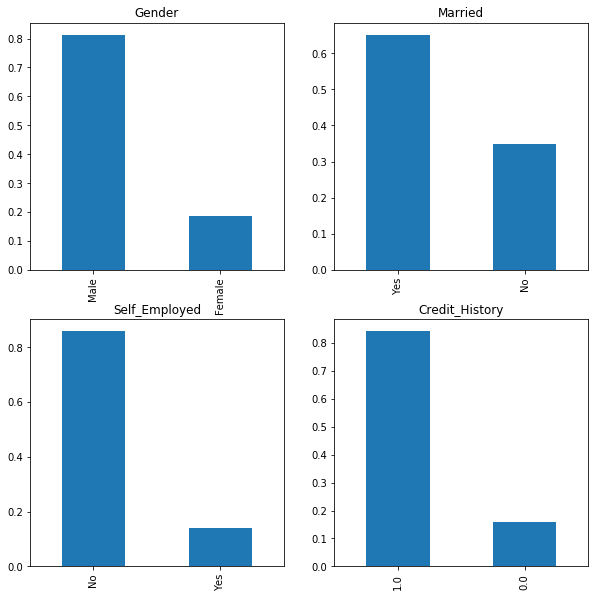

In [93]:
plt.figure(1)
plt.subplot(221)
loan_train.Gender.value_counts(normalize=True).plot.bar(figsize=(10,10),title='Gender')
plt.subplot(222)
loan_train.Married.value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
loan_train.Self_Employed.value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
loan_train.Credit_History.value_counts(normalize=True).plot.bar(title='Credit_History')

In [94]:
# from above we can say that 
# 80% male for have got the loan
# 85% applicants repaind their loans
#15% self employed 
#65% applicant married

<Figure size 432x288 with 0 Axes>

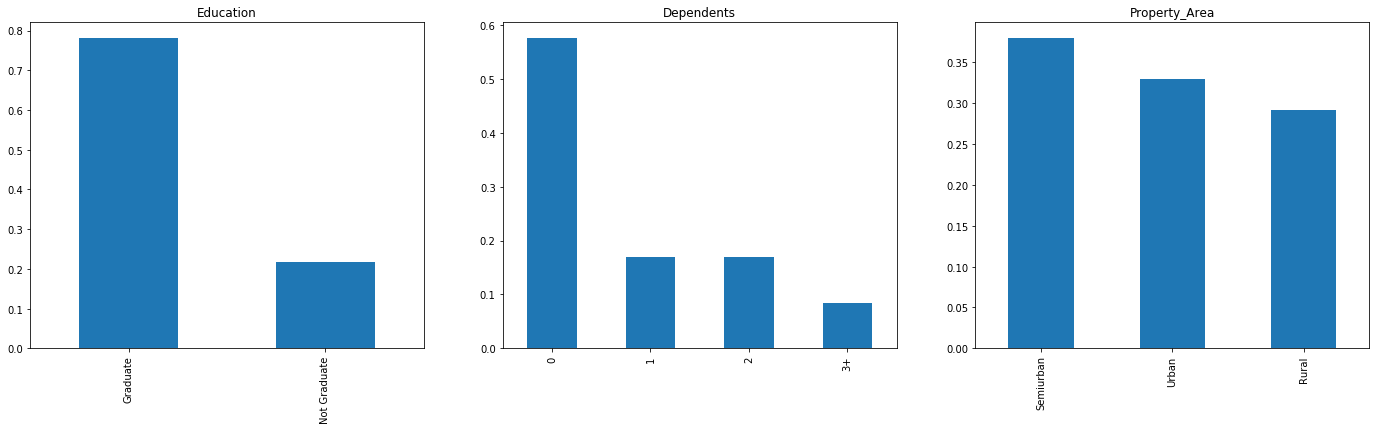

In [105]:
#Ordinal Variable
#Education,Dependents,Property_Area
plt.figure(1)
plt.subplot(131)
loan_train.Education.value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education')
plt.subplot(132)
loan_train.Dependents.value_counts(normalize=True).plot.bar(title='Dependents')
plt.subplot(133)
loan_train.Property_Area.value_counts(normalize=True).plot.bar(title='Property_Area')


In [106]:
#Around 78% applicant is gradutae
#Mostly applicant has no depedent , where 15% of them has 1 and 2 dependent
# most of them from semiurba area

<Figure size 432x288 with 0 Axes>

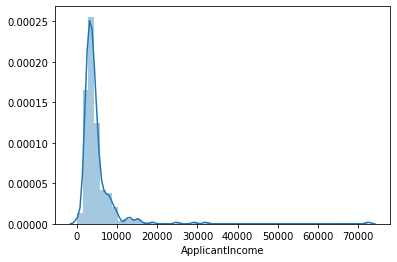

In [135]:
#Numerical feature(independent)
#ApplicantIncome , CoapplicantIncome,LoanAmount,Loan_Amount_Term
plt.figure(1)
plt.subplot(111)
sns.distplot(loan_test.ApplicantIncome)

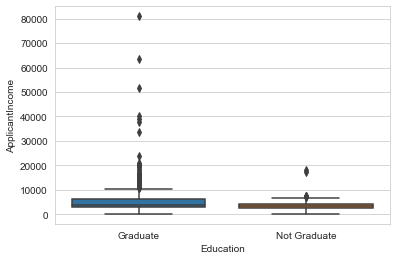

In [151]:
sns.set_style(style='whitegrid')
sns.boxplot(loan_train.Education,loan_train.ApplicantIncome)

In [152]:
#from above histogram of Applicantincome , most of the data lies towrsd left and its right skwed ,income disparity in 
#in society its not normally distributed
#box plot confirm presence of lots of outliers , by looking at education , gradute applicant has income higher then not gradute people


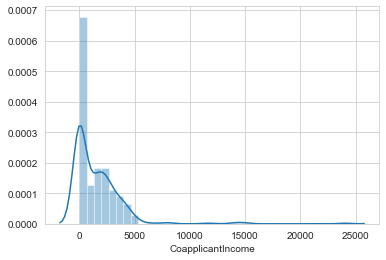

In [155]:
sns.distplot(loan_test.CoapplicantIncome)

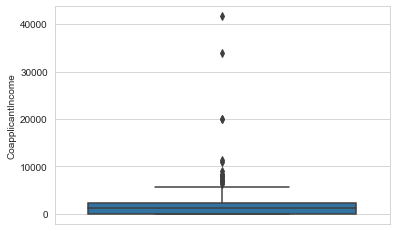

In [162]:
sns.set_style(style='whitegrid')
sns.boxplot(y=loan_train.CoapplicantIncome)

In [163]:
#similarly as we have seen applicantincome, coaaplicant income lies 0 to 5000 and have lots of outliers

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

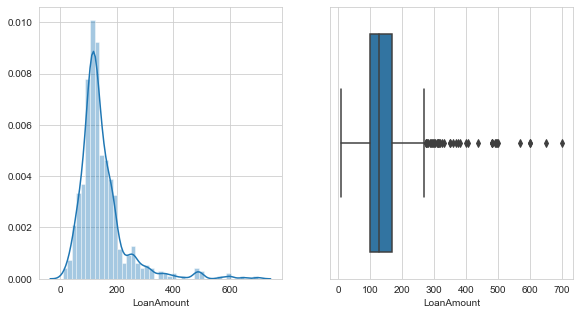

In [172]:
plt.figure(figsize=(20,5))
plt.figure(1)
plt.subplot(143)
sns.distplot(loan_train.LoanAmount)
plt.subplot(144)
sns.boxplot(loan_train.LoanAmount)

In [173]:
#Loanamount looks normally distrubute and it has outliers as wel, will see how we can handle the outliers values

In [252]:
#bivaroite analysis
#sns.pairplot(loan_train,hue='Loan_Status')
#sns.countplot(x=loan_train.Gender,hue=loan_train['Loan_Status'])
Gender=pd.crosstab(loan_train.Gender,loan_train.Loan_Status)
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


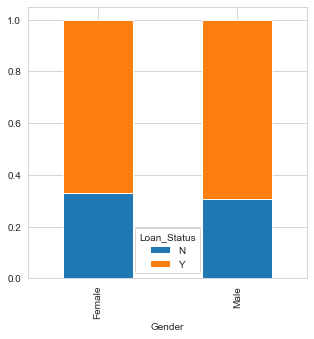

In [247]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.show()

In [253]:
#Above plot shows, there is no signifincat difference between mal and femal for loan approval rate

In [254]:
Married=pd.crosstab(loan_train.Married,loan_train.Loan_Status)
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


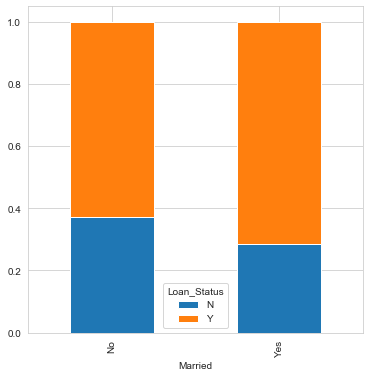

In [266]:
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,6))

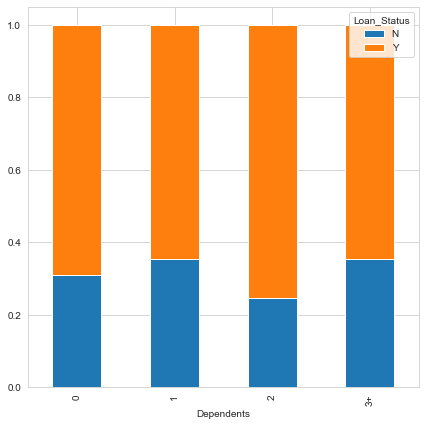

In [268]:
Dependents=pd.crosstab(loan_train.Dependents,loan_train.Loan_Status)
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(7,7))

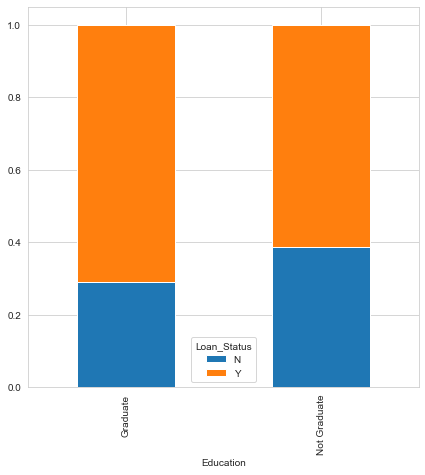

In [270]:
Education=pd.crosstab(loan_train.Education,loan_train.Loan_Status)
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(7,7))

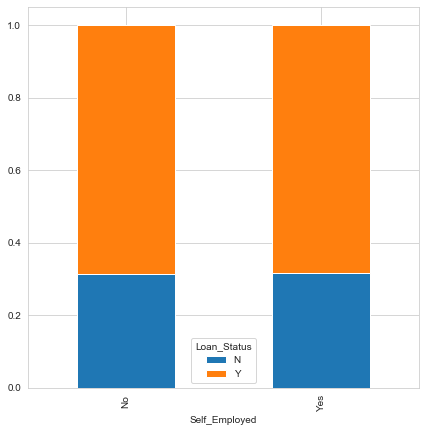

In [272]:
Self_Employed=pd.crosstab(loan_train.Self_Employed,loan_train.Loan_Status)
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(7,7))

In [273]:
# from above
# distribution of applicants for with 1 or 3+ dependent are similar acorss the both the loan_status catwgory
#Portion of maooried applicant is higher
# There is nothing significant we can infer from self employed bs loan_status catagory

In [274]:
# other categorical independent variable vs loan_status

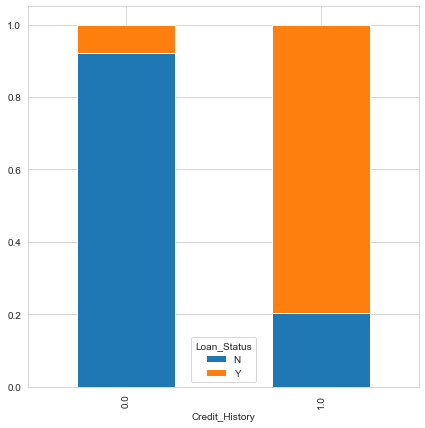

In [275]:
Credit_History=pd.crosstab(loan_train.Credit_History,loan_train.Loan_Status)
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(7,7))

In [276]:
#There is significant diffrence from Credit_History plot, as we can applicant who has paid previous loan has more likly 
# to getloan approval

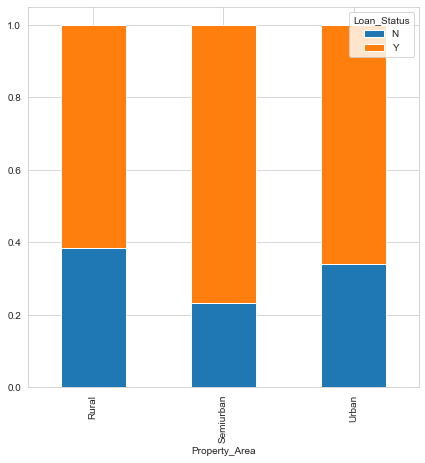

In [278]:
Property_Area=pd.crosstab(loan_train.Property_Area,loan_train.Loan_Status)
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(7,7))

In [280]:
#semiurban area has more chances to get the loan approve, in comaprison to rural and urban area

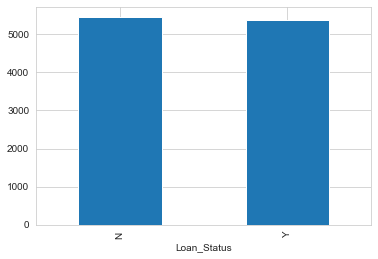

In [283]:
#Numerical Independent variable Vs Target Variable Loan_status
#ApplicantIncome , CoapplicantIncome,LoanAmount,Loan_Amount_Term
loan_train.groupby('Loan_Status')['ApplicantIncome'].mean().plot(kind='bar')

In [284]:
#above plot dint show much difference between applicant mean income compare to loan_status
#let create some bins 

In [294]:
bins=[0,2500,4000,6000,81000] 
group=['low','Average','High','Very High']

In [326]:
loan_train['Income_Bin']=pd.cut(loan_train.ApplicantIncome,bins,labels=group)
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,Average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,High
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,Very High
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,Very High


In [318]:
Income=pd.crosstab(loan_train['Income_Bin'],loan_train['Loan_Status'])
Income

Loan_Status,N,Y
Income_Bin,,
low,34,74
Average,67,159
High,45,98
Very High,46,91


In [319]:
Income.sum(1)

Income_Bin
low          108
Average      226
High         143
Very High    137
dtype: int64

In [317]:
Income.div(Income.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Income_Bin,,
low,0.314815,0.685185
Average,0.296460,0.703540
High,0.314685,0.685315
Very High,0.335766,0.664234


Text(0.5, 0, 'ApplicantIncome')

Text(0, 0.5, 'Percentage')

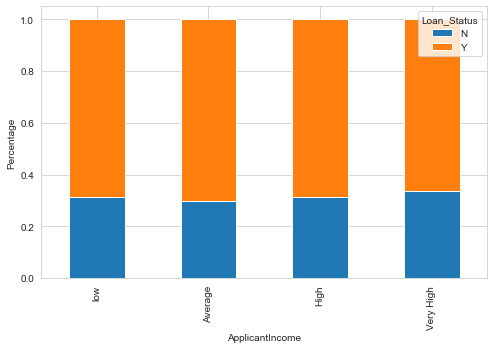

In [323]:
Income.div(Income.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(8,5))
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

In [324]:
#Apllicant income does not effect the loan status, which is contradict as we have mentioed earlier in hypothesis

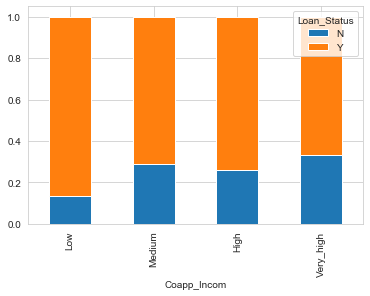

In [358]:
# will analyse the coapplicant income in the same manne
#loan_train.CoapplicantIncome.describe()
bins=[0,1000,2000,3000,42000]
group=['Low','Medium','High','Very_high']
loan_train['Coapp_Incom']=pd.cut(loan_train.CoapplicantIncome,bins,labels=group)
Coapp_income=pd.crosstab(loan_train.Coapp_Incom,loan_train.Loan_Status)
Coapp_income.div(Coapp_income.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Above graph shows, less the coapplicant income has more chances to loan get approved, which doenst looks good, may be most of
most of the aaplicant has no coaaplicant and its 0 for those applicant , so will combine the both the income and will see

In [362]:
loan_train['Total_income']=loan_train.ApplicantIncome+loan_train.CoapplicantIncome
loan_train.Total_income.describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_income, dtype: float64

Text(0.5, 0, 'TOTAL_INCOME')

Text(0, 0.5, 'PRECENTAGE')

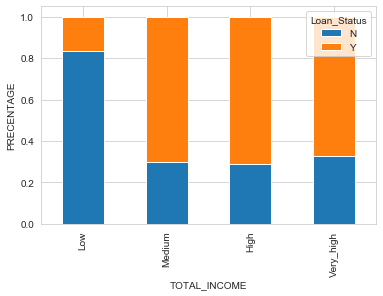

In [373]:
bins=[0,2000,4000,6000,82000]
group=['Low','Medium','High','Very_high']
loan_train['Total_Income_Bin']=pd.cut(loan_train.Total_income,bins,labels=group)
total_income_cross=pd.crosstab(loan_train.Total_Income_Bin,loan_train.Loan_Status)
total_income_cross.div(total_income_cross.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('TOTAL_INCOME')
plt.ylabel('PRECENTAGE')

In [374]:
#Above plot clearly shows those have income between median and high has percentage to get loan approved, low_inmcome has very
# low percentage

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

Text(0.5, 0, 'TOTAL_LOAN_AMOUNT')

Text(0, 0.5, 'PRECENTAGE')

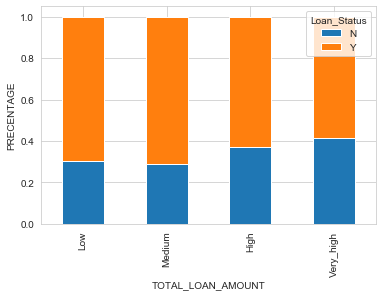

In [382]:
# will see the loan Amount variable
loan_train.LoanAmount.describe()
bins=[0,100,200,300,800]
group=['Low','Medium','High','Very_high']
loan_train['LoanAmount_Bin']=pd.cut(loan_train.LoanAmount,bins,labels=group)
LoanAmount_cross=pd.crosstab(loan_train.LoanAmount_Bin,loan_train.Loan_Status)
LoanAmount_cross.div(LoanAmount_cross.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('TOTAL_LOAN_AMOUNT')
plt.ylabel('PRECENTAGE')

proportion of loan approval are high for Low and median income,in comare to high income, which is also supported the hypothesis
lower the loan higher the chanced of loan get approved

In [385]:
#now will drop the bins column we have created and will replace the dependent 3+ to 3 and also will replace the LOAN_SATUS Y=1
#N=0
loan_train=loan_train.drop(['Income_Bin','Coapp_Incom','Total_income','Total_Income_Bin','LoanAmount_Bin'],axis=1)

In [387]:
loan_train['Loan_Status'].replace('N',0,inplace=True)

In [388]:
loan_train['Loan_Status'].replace('Y',1,inplace=True)

In [392]:
loan_train['Dependents'].replace('3+',3,inplace=True)

In [395]:
loan_test['Dependents'].replace('3+',3,inplace=True)

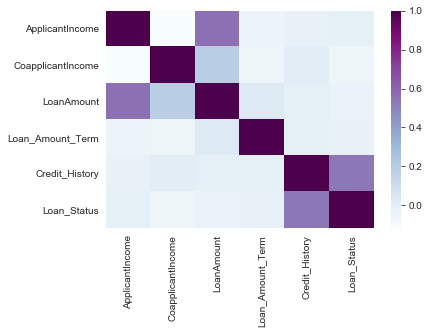

In [494]:
#now will see the correlation between all numerical value
sns.heatmap(loan_train.corr(),cmap='BuPu')

In [400]:
# most correlated variables are Applicant Income and Loan Anount

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f376bd9708>)

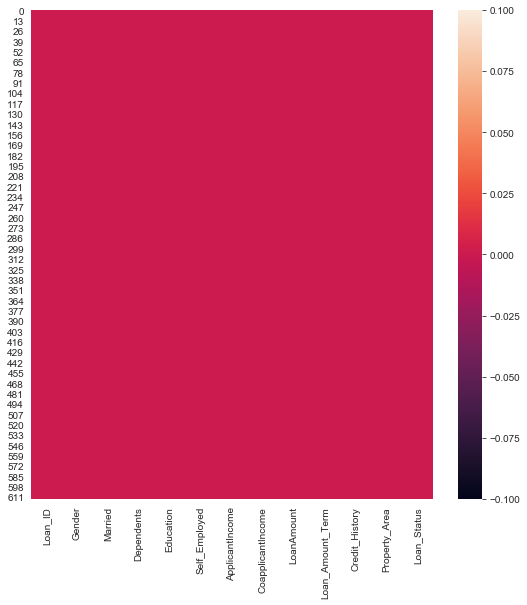

In [488]:
#Will now try to fill na values
plt.subplots(figsize=(9,9))
sns.heatmap(loan_train.isna())

In [489]:
loan_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f3061fbb08>)

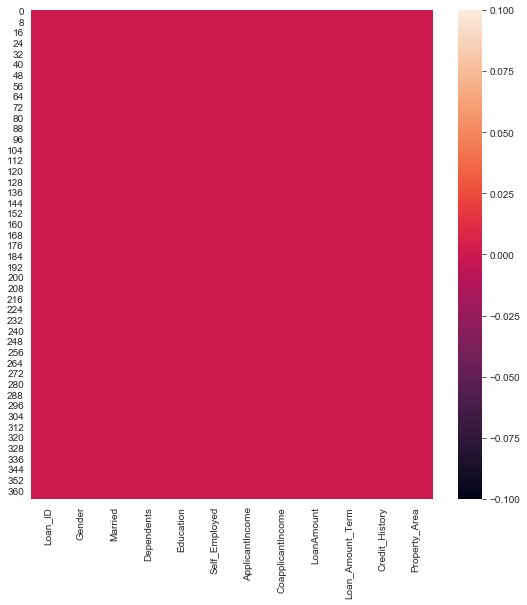

In [491]:
plt.subplots(figsize=(9,9))
sns.heatmap(loan_test.isna())

In [418]:
# for Categorical Variable : will use mode to fill na values
# for Numerical values : will use mean or median
#will treat each valure one by one

In [435]:
# for gneder Married, dependemts, self_employed less values will use mode to fill 
loan_train.Gender.fillna(loan_train.Gender.mode()[0], inplace=True)

In [438]:
loan_train.Married.fillna(loan_train.Married.mode()[0], inplace=True)

In [441]:
loan_train.Dependents.fillna(loan_train.Dependents.mode()[0], inplace=True)

In [462]:
loan_train.Self_Employed.fillna(loan_train.Self_Employed.mode()[0], inplace=True)
loan_train.Credit_History.fillna(loan_train.Credit_History.mode()[0], inplace=True)

In [471]:
loan_train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [464]:
loan_test.Gender.fillna(loan_test.Gender.mode()[0], inplace=True)
loan_test.Married.fillna(loan_test.Married.mode()[0], inplace=True)
loan_test.Dependents.fillna(loan_test.Dependents.mode()[0], inplace=True)
loan_test.Self_Employed.fillna(loan_test.Self_Employed.mode()[0], inplace=True)
loan_test.Credit_History.fillna(loan_test.Credit_History.mode()[0], inplace=True)

In [486]:
loan_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [485]:
# now will fill na for Numeric values
loan_test.Loan_Amount_Term.fillna(loan_test.Loan_Amount_Term.mode()[0],inplace=True)
loan_train.Loan_Amount_Term.fillna(loan_train.Loan_Amount_Term.mode()[0],inplace=True)

In [483]:
loan_test.LoanAmount.fillna(loan_test.LoanAmount.median(),inplace=True)
loan_train.LoanAmount.fillna(loan_train.LoanAmount.median(),inplace=True)

Text(0.5, 0, 'Using Log normal distribution')

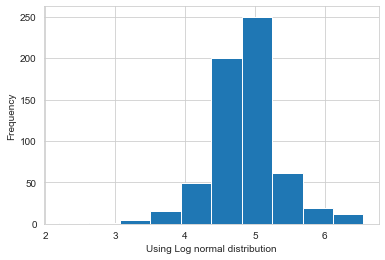

In [498]:
#Outlier handling, as we have seen outlier in 
loan_train['LoanAmount_log']=np.log(loan_train['LoanAmount'])
loan_train.LoanAmount_log.plot(kind='hist')
plt.xlabel('Using Log normal distribution')

In [497]:
loan_test['LoanAmount_log']=np.log(loan_test['LoanAmount'])

# Model Building

In [499]:
# lets remov the lona_id column
loan_train=loan_train.drop('Loan_ID',axis=1)
loan_test=loan_test.drop('Loan_ID',axis=1)

In [517]:
# Will create  independent and dependent vaiable separate 
X=loan_train.drop('Loan_Status',axis=1)
y=loan_train.Loan_Status

In [518]:
X=pd.get_dummies(X,drop_first=True)

In [519]:
loan_test=pd.get_dummies(loan_test,drop_first=True)

In [521]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [523]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [524]:
model=LogisticRegression()

In [527]:
model.fit(X_train,y_train)

C:\Users\SaurabhSaxena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [528]:
pred_cv=model.predict(X_test)

In [529]:
accuracy_score(y_test,pred_cv)

0.7980295566502463

In [530]:
#prediction on test data
pred_test=model.predict(loan_test)

In [531]:
submission=pd.read_csv(r'C:/pers/saurabh/cloud/ML/Analy_Vidya/LOAN_PREDICTION/sample_submission_49d68Cx.csv')

In [532]:
submission

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [538]:
loan_test_original=pd.read_csv(r'C:/pers/saurabh/cloud/ML/Analy_Vidya/LOAN_PREDICTION/test_lAUu6dG.csv')

In [539]:
submission['Loan_ID']=loan_test_original.Loan_ID

In [540]:
submission['Loan_Status']=pred_test

In [549]:
submission.Loan_Status.replace(1,'Y',inplace=True)
submission.Loan_Status.replace(0,'N',inplace=True)

In [551]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Loan_prediction_log.csv',index=False)

In [552]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [554]:
submission.shape

(367, 2)